In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
berdo = pd.read_csv(".\\data\\berdo.csv")

print(berdo.columns)

cols_num = ['Gross Area (sq ft)', 'Site EUI (kBTU/sf)',
        'GHG Emissions (MTCO2e)', 'GHG Intensity (kgCO2/sf)',
        ' Total Site Energy (kBTU) ','Water Intensity (gal/sf)']

cols_percent = ["% Gas", "% Steam", "% Electricity"]

def to_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return -1

def fix_numerical(columns):
    
    for c in columns:
        for year in ("_2014","_2015"):
            cyear = c + year
            berdo[cyear] = berdo[cyear].map(lambda x: str(x).strip().replace(",",""))
            berdo[cyear] = berdo[cyear].map(to_number)
            cyear = c
            
def fix_percenteage(columns):
    
    for c in columns:
        for year in ("_2014","_2015"):
            cyear = c + year
            berdo[cyear].fillna("0%", inplace=True)
            berdo[cyear] = berdo[cyear].map(lambda x: float(x.strip().replace("%","")))         
            cyear = c

fix_numerical(cols_num)
fix_percenteage(cols_percent)

berdo["%_total_2015"] = berdo[["% Gas_2015","% Steam_2015","% Electricity_2015"]].sum(axis=1)
berdo["%_total_2014"] = berdo[["% Gas_2014","% Steam_2014","% Electricity_2014"]].sum(axis=1)

Index(['Property Name', 'Reported_2015', 'Property Type_2015', 'Address',
       'ZIP_2015', 'Gross Area (sq ft)_2015', 'Site EUI (kBTU/sf)_2015',
       'Energy Star Score_2015', 'Energy Star Certified_2015',
       'Property Uses_2015', 'Year Built_2015', 'GHG Emissions (MTCO2e)_2015',
       'GHG Intensity (kgCO2/sf)_2015', ' Total Site Energy (kBTU) _2015',
       '% Electricity_2015', '% Gas_2015', '% Steam_2015',
       'Water Intensity (gal/sf)_2015', 'Onsite Solar (kWh)_2015',
       'User Submitted Info_2015', 'User Submitted Link_2015',
       'Tax Parcel_2015', 'Years Reported', 'Reported_2014',
       'Property Type_2014', 'ZIP_2014', 'Gross Area (sq ft)_2014',
       'Site EUI (kBTU/sf)_2014', 'Energy Star Score_2014',
       'Energy Star Certified_2014', 'Property Uses_2014', 'Year Built_2014',
       'GHG Emissions (MTCO2e)_2014', 'GHG Intensity (kgCO2/sf)_2014',
       ' Total Site Energy (kBTU) _2014', '% Electricity_2014', '% Gas_2014',
       '% Steam_2014', 'Water I

In [3]:
berdo = berdo[["Property Name","Address","ZIP_2015","Year Built_2015",
       "Property Type_2015","Property Type_2014",
       "Gross Area (sq ft)_2015","Gross Area (sq ft)_2014",
       "Site EUI (kBTU/sf)_2015","Site EUI (kBTU/sf)_2014",
       " Total Site Energy (kBTU) _2015"," Total Site Energy (kBTU) _2014",
       "GHG Emissions (MTCO2e)_2015","GHG Emissions (MTCO2e)_2014",
       "GHG Intensity (kgCO2/sf)_2015","GHG Intensity (kgCO2/sf)_2014",
       "% Electricity_2015", "% Gas_2015", "% Steam_2015","%_total_2015",
       "% Electricity_2014", "% Gas_2014", "% Steam_2014","%_total_2014"
      ]]

### remove data that doesn't seem right. A deeper investigation should be done here
#print(berdo.isnull().sum())
print(berdo.shape)

print("---------")

# set values -1 to NaN
berdo.replace(-1,np.NaN,inplace=True)
# remove if total energy < 90. Check these deeper
berdo = berdo[(berdo["%_total_2015"] > 90) & (berdo["%_total_2014"] > 90)]
# drop all missing values
berdo.dropna(axis=0, how='any', inplace=True)
print(berdo.shape)

(1086, 24)
---------
(923, 24)


In [4]:
berdo_diff = pd.DataFrame()
berdo_diff[["property_name", "address","zip","year_built"]] = berdo[["Property Name","Address","ZIP_2015","Year Built_2015"]]
berdo_diff[["property_type_2015","property_type_2014"]] = berdo[["Property Type_2015","Property Type_2014"]]
berdo_diff["gloss_area_sqft"] = berdo["Gross Area (sq ft)_2015"]
berdo_diff["gloss_area_sqft_diff"] = berdo["Gross Area (sq ft)_2015"] - berdo["Gross Area (sq ft)_2014"]
berdo_diff["energy_kbtu/sf_diff"] = berdo["Site EUI (kBTU/sf)_2015"] - berdo["Site EUI (kBTU/sf)_2014"]
berdo_diff["energy_total_kbtu_diff"] = berdo[" Total Site Energy (kBTU) _2015"] - berdo[" Total Site Energy (kBTU) _2014"]
berdo_diff["ghg_emissions_mtco2e_diff"] = berdo["GHG Emissions (MTCO2e)_2015"] - berdo["GHG Emissions (MTCO2e)_2014"]
berdo_diff["ghg_intensity_kgco2/sf_diff"] = berdo["GHG Intensity (kgCO2/sf)_2015"] - berdo["GHG Intensity (kgCO2/sf)_2014"]

In [5]:
import requests

def get_long_lat(address):

    fix_add = address.replace(" ","+")
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address=' + fix_add + ',+Boston,+Massachusetts,+USA'
    try:        
        response = requests.get(url)
        resp_json_payload = response.json()
        info =(resp_json_payload['results'][0]['geometry']['location'])
    except:
        info='***** Fail !!!! *****'
    if info != '***** Fail !!!! *****':
        return (info['lat'],info['lng'])

In [ ]:
berdo_diff["lat_long"] = berdo_diff.address.map(get_long_lat)

In [6]:
berdo_diff.head()

,property_name,address,zip,year_built,property_type_2015,property_type_2014,gloss_area_sqft,gloss_area_sqft_diff,energy_kbtu/sf_diff,energy_total_kbtu_diff,ghg_emissions_mtco2e_diff,ghg_intensity_kgco2/sf_diff
0,#2679 south bay/boston,5 alllstate road,02125,1998,Retail Store,Retail Store,132000.0,0.0,6.9,912943.0,47.5,0.4
1,0004 roslindale,950 american legion hgwy,02131,2001,Supermarket/Grocery Store,Supermarket/Grocery Store,38694.0,0.0,-2.8,-107313.0,-19.4,-0.5
2,0018 dorchester,545 freeport street,02122,2005,Supermarket/Grocery Store,Supermarket/Grocery Store,61548.0,0.0,-2.3,-146136.1,-31.9,-0.5
3,0053 south boston,713 e. broadway,02127,2005,Supermarket/Grocery Store,Supermarket/Grocery Store,30982.0,0.0,-4.9,-152937.9,-2.6,0.0
4,0089 allston,60 everett st.,02134,2005,Supermarket/Grocery Store,Supermarket/Grocery Store,79894.0,0.0,-15.9,-1275106.8,-100.9,-1.2


1) Map with highest to lowest diff

2) avg/median diff by property type

3) avg/median diff by property zip code

4) avg/median diff by property decade built


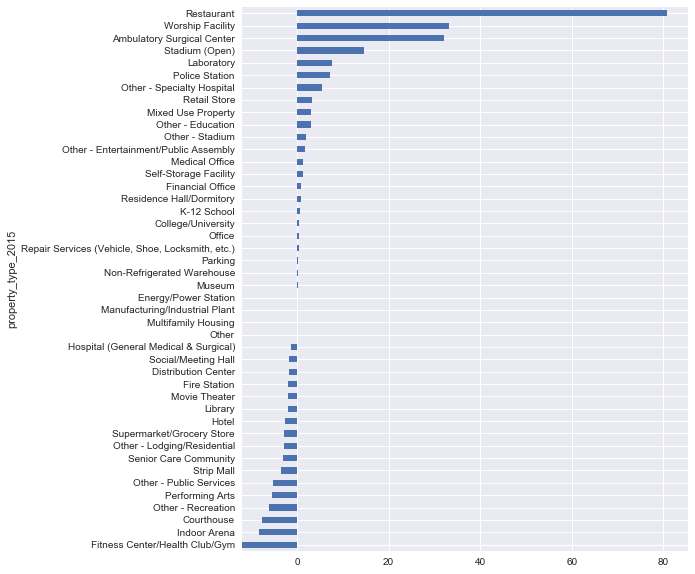

In [57]:
a = berdo_diff.groupby(["property_type_2015"])['energy_kbtu/sf_diff'].median()
a = a[a <1000].sort_values()
plt.figure(figsize=(8, 10))
a.plot(kind="barh")
plt.show()

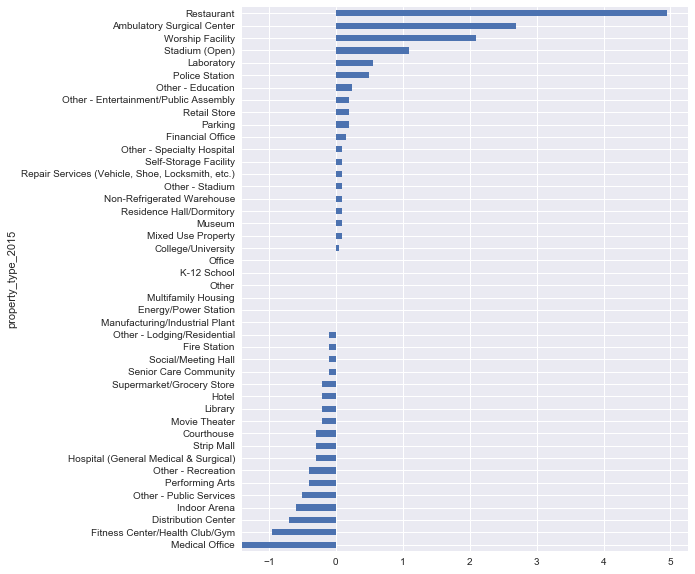

In [65]:
a = berdo_diff.groupby(["property_type_2015"])['ghg_intensity_kgco2/sf_diff'].median()
a = a[a <500].sort_values()
plt.figure(figsize=(8, 10))
a.plot(kind="barh")
plt.show()

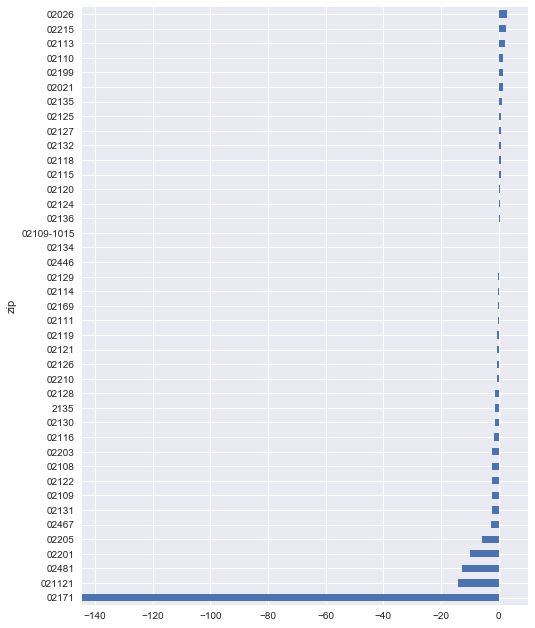

In [63]:
a = berdo_diff.groupby(["zip"])['energy_kbtu/sf_diff'].median()
a = a[a <1000].sort_values()
plt.figure(figsize=(8, 11))
a.plot(kind="barh")
plt.show()

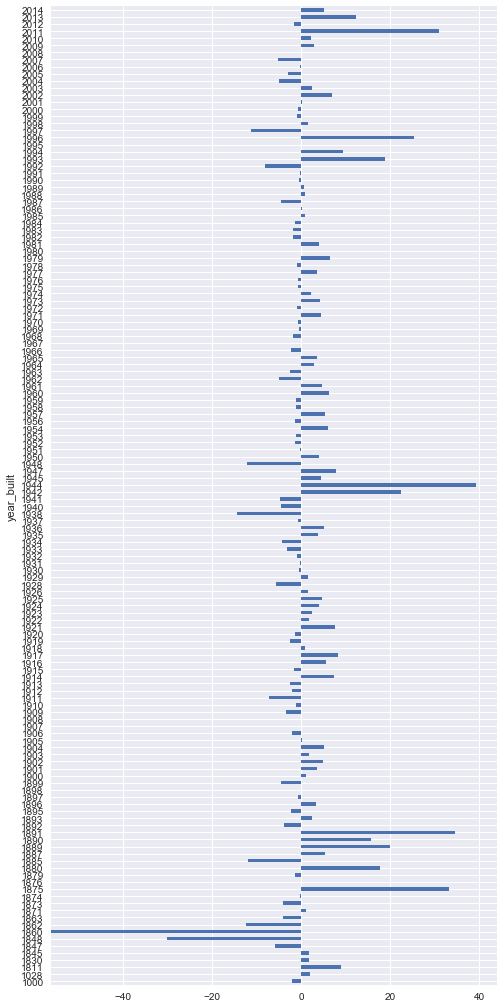

In [61]:
a = berdo_diff.groupby(["year_built"])['energy_kbtu/sf_diff'].median()
a = a[a <1000].sort_index()
plt.figure(figsize=(8, 18))
a.plot(kind="barh")
plt.show()

In [ ]:
get_long_lat("713 e. broadway")

In [ ]:
self.map = Basemap(projection='merc', lat_0=mlat, lon_0=mlon, resolution = 'l', area_thresh = 1.0, 
llcrnrlon=-num, llcrnrlat=num, 
urcrnrlon=-num, urcrnrlat=num) 

map.readshapefile('/home/person/zipfolder/rds/tl_2010_48_prisecroads', 'Streets',drawbounds = False)

for shape in self.map.Streets:
    xx, yy, = zip(*shape)
    self.map.plot(xx, yy, linewidth = 1.5, color='green', alpha=.75)   
##Same for zip codes

In [ ]:
from pandas.tools.plotting import scatter_matrix

attributes = ["gloss_area_sqft", "energy_kbtu/sf_diff","energy_total_kbtu_diff",
              "ghg_emissions_mtco2e_diff", "ghg_intensity_kgco2/sf_diff"]

scatter_matrix(berdo_diff[attributes], figsize=(25, 20), alpha=1,grid=True)
plt.show()

In [ ]:
set(berdo["Property Type_2015"].value_counts().index.tolist()) - set(berdo["Property Type_2014"].value_counts().index.tolist())

In [ ]:
berdo.shape

In [ ]:
berdo.isnull().sum()

In [ ]:
berdo[["% Gas_2015","% Steam_2015","% Electricity_2015"]].sum(axis=1).value_counts().loc[50:]

In [ ]:
berdo[["% Gas_2014","% Steam_2014","% Electricity_2014"]].sum(axis=1).value_counts()

In [ ]:
berdo["%_total_2015"] = berdo[["% Gas_2015","% Steam_2015","% Electricity_2015"]].sum(axis=1)
berdo["%_total_2014"] = berdo[["% Gas_2014","% Steam_2014","% Electricity_2014"]].sum(axis=1)

In [ ]:
berdo[berdo["Year Built_2015"] != berdo["Year Built_2014"]][["Year Built_2015","Year Built_2014"]]

In [ ]:
berdo[["Property Name","Address","ZIP_2015","Year Built_2015"
       "Property Type_2015","Property Type_2014"
       "Gross Area (sq ft)_2015","Gross Area (sq ft)_2014",
       "Site EUI (kBTU/sf)_2015","Site EUI (kBTU/sf)_2014",
       " Total Site Energy (kBTU) _2015"," Total Site Energy (kBTU) _2014",
       "GHG Emissions (MTCO2e)_2015","GHG Emissions (MTCO2e)_2014",
       "GHG Intensity (kgCO2/sf)_2015","GHG Intensity (kgCO2/sf)_2014"
      ]]